In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter

In [3]:
book = pd.read_csv('book (1).csv', encoding = 'latin-1')
book

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [4]:
book = book.iloc[:,1:]
book

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [5]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User.ID      10000 non-null  int64 
 1   Book.Title   10000 non-null  object
 2   Book.Rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [6]:
book[book.duplicated()]

,User.ID,Book.Title,Book.Rating
5051,2152,Le nouveau soleil de Teur,7
7439,3757,The Magician's Tale,7


In [7]:
book = book.drop_duplicates()

In [8]:
book.head()

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [9]:
book.tail()

,User.ID,Book.Title,Book.Rating
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8
9999,162129,Kids Say the Darndest Things,6


In [15]:
book.sort_values('Book.Rating', ascending = False)

,User.ID,Book.Title,Book.Rating
8709,161214,Quality Is Free: The Art of Making Quality Cer...,10
1404,277984,Only the Wind Remembers,10
1402,277984,Hiding Place,10
6462,3346,Damnation Alley,10
1399,277982,A Tree Grows in Brooklyn,10
...,...,...,...
1717,278202,Catechism of the Catholic Church,1
9598,161968,Pretty in Pink,1
640,277363,Children of the Night,1
8879,161348,"Eddie Would Go : The Story of Eddie Aikau, Haw...",1


# Recommendation using Cosine similarity

# User-User Similarity (Cosine)

In [16]:
user_book_matrix = book.pivot_table(index = 'User.ID', columns = 'Book.Title', values = 'Book.Rating')
user_book_matrix

Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
User.ID,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN


In [17]:
user_book_matrix.fillna(0, inplace = True)

In [18]:
user_book_matrix

Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
User.ID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


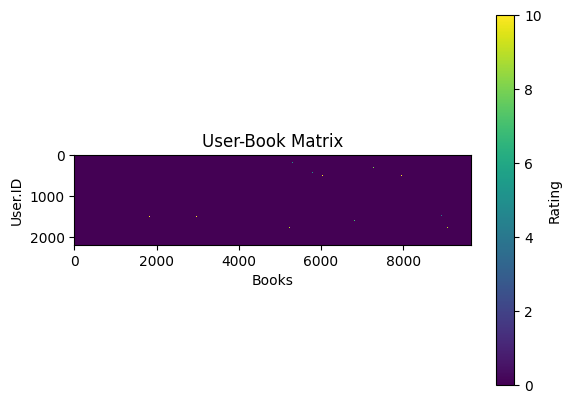

In [19]:
plt.imshow(user_book_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Rating')
plt.xlabel('Books')
plt.ylabel('User.ID')
plt.title('User-Book Matrix')
plt.show()

In [20]:
user_similarity_matrix = cosine_similarity(user_book_matrix)

In [21]:
user_similarity_matrix

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [22]:
np.fill_diagonal(user_similarity_matrix, 0)

In [23]:
user_similarity_df = pd.DataFrame(user_similarity_matrix, columns = book['User.ID'].unique(), index = book['User.ID'].unique())

In [24]:
user_similarity_df

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* Recommendation for User-User similarity

In [26]:
def Recommendation(User_id):

    try:
        similer_user=list(user_similarity_df.sort_values([User_id],ascending=False).head(5).index)
        Book_list=list(book[book["User.ID"].isin(similer_user)]["Book.Title"])


        Book_user=Counter(Book_list).most_common()


        if Book_user==set():
            return "Not much similar customer to recomend!"
        return("Recomended Books are:",Book_user)

    except:
        return "User Id is not Available!"

In [27]:
Recommendation(278831)

('Recomended Books are:',
 [('Classical Mythology', 1),
  ('A Man of Steel', 1),
  ('Groom For Maggie (Whirlwind Weddings) (Silhouette Romance)', 1),
  ('The Dark Druid', 1),
  ('The Apprentice', 1),
  ('The Seventh Night', 1)])

In [28]:
Recommendation(162113)

('Recomended Books are:',
 [('Classical Mythology', 1),
  ('A Man of Steel', 1),
  ('Groom For Maggie (Whirlwind Weddings) (Silhouette Romance)', 1),
  ('Cinnamon (Shooting Stars)', 1),
  ('Home Song', 1),
  ('Surrender to Love (Avon Historical Romance)', 1),
  ('Spring Fancy', 1),
  ('Surrender', 1),
  ('Bread, Tomato, Garlic: Quick Cooking With 3 Main Ingredients', 1),
  ("The Ubiquitous Shrimp: From Simple to Exotic, from Feasts to Snacks, All the Wonderful Ways to Savor America's Favorite Seafood",
   1)])

# Item-Item Similarity (Cosine)

In [29]:
book_user_matrix = user_book_matrix.T

In [30]:
book_user_matrix

User.ID,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
Book.Title,,,,,,,,,,,,,,,,,,,,,
"Jason, Madison &amp",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Other Stories;Merril;1985;McClelland &amp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Repairing PC Drives &amp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\Well, there's your problem\: Cartoons",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iI Paradiso Degli Orchi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [31]:
item_similarity_matrix = cosine_similarity(book_user_matrix)

In [32]:
item_similarity_matrix

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [33]:
np.fill_diagonal(item_similarity_matrix, 0)

In [34]:
item_similarity_matrix

array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
item_similarity_df = pd.DataFrame(item_similarity_matrix, columns = book['Book.Title'].unique(), index = book['Book.Title'].unique())

In [36]:
item_similarity_df

,Classical Mythology,Clara Callan,Decision in Normandy,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,The Mummies of Urumchi,The Kitchen God's Wife,What If?: The World's Foremost Military Historians Imagine What Might Have Been,PLEADING GUILTY,Under the Black Flag: The Romance and the Reality of Life Among the Pirates,Where You'll Find Me: And Other Stories,...,The Cloister Walk,Open Water,The Evolution of Jane,AT PARADISE GATE,I Should Have Stayed Home: The Worst Trips of the Great Writers (Travel Literature Series),American Fried: Adventures of a Happy Eater.,Cannibal In Manhattan,How to Flirt: A Practical Guide,Twilight,Kids Say the Darndest Things
Classical Mythology,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Clara Callan,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Decision in Normandy,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Mummies of Urumchi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
American Fried: Adventures of a Happy Eater.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cannibal In Manhattan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
How to Flirt: A Practical Guide,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Twilight,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* Recommendations for Item-Item similarity

In [37]:
Book_1 = book[book["Book.Title"] == "Kids Say the Darndest Things"]
Book_2 = book[book["Book.Title"] == "Cannibal In Manhattan"]
Book_3 = book[book["Book.Title"] == "How to Flirt: A Practical Guide"]

In [38]:
Book_1

,User.ID,Book.Title,Book.Rating
9999,162129,Kids Say the Darndest Things,6


 Here, the book "Kids Say the Darndest Things"	can be recommended to the User.ID 162129

In [39]:
Book_2

,User.ID,Book.Title,Book.Rating
9996,162121,Cannibal In Manhattan,9


 Here, the book "Cannibal In Manhattan"	can be recommended to the User.ID 162121

In [40]:
Book_3

,User.ID,Book.Title,Book.Rating
9997,162121,How to Flirt: A Practical Guide,7


 Here, the book "How to Flirt: A Practical Guide	"	can be recommended to the User.ID 162121

# Recommendation using Euclidean distance

# User-User Similarity (Euclidean)

In [41]:
from sklearn.metrics.pairwise import euclidean_distances

In [42]:
user_similarity_matrix2 = euclidean_distances(user_book_matrix)

In [43]:
user_similarity_matrix2

array([[ 0.        , 16.03121954, 16.03121954, ..., 29.05167809,
        16.88194302, 22.737634  ],
       [16.03121954,  0.        ,  8.48528137, ..., 25.67099531,
        10.        , 18.22086716],
       [16.03121954,  8.48528137,  0.        , ..., 25.67099531,
        10.        , 18.22086716],
       ...,
       [29.05167809, 25.67099531, 25.67099531, ...,  0.        ,
        26.21068484, 30.31501278],
       [16.88194302, 10.        , 10.        , ..., 26.21068484,
         0.        , 18.97366596],
       [22.737634  , 18.22086716, 18.22086716, ..., 30.31501278,
        18.97366596,  0.        ]])

In [44]:
user_similarity_df2 = pd.DataFrame(user_similarity_matrix2, columns = book['User.ID'].unique(), index = book['User.ID'].unique())

In [45]:
user_similarity_df2

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,0.000000,16.031220,16.031220,17.916473,17.521415,17.378147,18.439089,16.431677,16.431677,20.049938,...,17.916473,22.825424,16.881943,37.854986,18.493242,16.881943,17.378147,29.051678,16.881943,22.737634
276729,16.031220,0.000000,8.485281,11.661904,11.045361,10.816654,12.449900,9.219544,9.219544,14.730920,...,11.661904,18.330303,10.000000,35.327043,12.529964,10.000000,10.816654,25.670995,10.000000,18.220867
276736,16.031220,8.485281,0.000000,11.661904,11.045361,10.816654,12.449900,9.219544,9.219544,14.730920,...,11.661904,18.330303,10.000000,35.327043,12.529964,10.000000,10.816654,25.670995,10.000000,18.220867
276737,17.916473,11.661904,11.661904,0.000000,13.638182,13.453624,14.798649,12.206556,12.206556,16.763055,...,14.142136,20.000000,12.806248,36.221541,14.866069,12.806248,13.453624,26.888659,12.806248,19.899749
276744,17.521415,11.045361,11.045361,13.638182,0.000000,12.922848,14.317821,11.618950,11.618950,16.340135,...,13.638182,19.646883,12.247449,36.027767,14.387495,12.247449,12.922848,26.627054,12.247449,19.544820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,16.881943,10.000000,10.000000,12.806248,12.247449,12.041595,13.527749,10.630146,10.630146,15.652476,...,12.806248,19.078784,11.313708,35.721142,13.601471,0.000000,12.041595,26.210685,11.313708,18.973666
162109,17.378147,10.816654,10.816654,13.453624,12.922848,12.727922,14.142136,11.401754,11.401754,16.186414,...,13.453624,19.519221,12.041595,35.958309,14.212670,12.041595,0.000000,26.532998,12.041595,19.416488
162113,29.051678,25.670995,25.670995,26.888659,26.627054,26.532998,27.239677,25.922963,25.922963,28.354894,...,26.888659,30.380915,26.210685,42.836900,27.276363,26.210685,26.532998,0.000000,26.210685,30.315013
162121,16.881943,10.000000,10.000000,12.806248,12.247449,12.041595,13.527749,10.630146,10.630146,15.652476,...,12.806248,19.078784,11.313708,35.721142,13.601471,11.313708,12.041595,26.210685,0.000000,18.973666


* Recommendation for User-User similarity

In [46]:
def Recommendation(User_id2):

    try:
        similer_user2=list(user_similarity_df2.sort_values([User_id2],ascending=False).head(5).index)
        Book_list2=list(book[book["User.ID"].isin(similer_user2)]["Book.Title"])


        Book_user2=Counter(Book_list2).most_common()


        if Book_user2==set():
            return "Not much similar customer to recomend!"
        return("Recomended Books are:",Book_user2)

    except:
        return "User Id is not Available!"

In [47]:
Recommendation(277554)

('Recomended Books are:',
 [('Random Acts Of Management:A Dilbert Book', 1),
  ('Fifth business', 1),
  ('Vida Sin Condiciones', 1),
  ('Canibales y Reyes', 1),
  ('Obras Completas De Agatha Christie (Grandes Maestros Del Crimen Y Misterio)',
   1),
  ('Return of the Jedi: The Original Radio Drama', 1),
  ("Silver's Spells for Protection", 1),
  ('Knee Deep in Paradise (Nova Audio Books)', 1),
  ("Isaac Asimov's Robot City Volume 1 (Robot City (Two in One Collection))",
   1),
  ('A Dream Is a Wish Your Heart Makes: My Story', 1),
  ('Packing Heat (Harlequin Temptation, No. 965)', 1),
  ('Who Was Harry Houdini? (Who Was...?)', 1),
  ('Claudia and the Clue in the Photograph (Baby-Sitters Club Mystery, 16)',
   1),
  ("This Day in Rock: Day by Day Record of Rock's Biggest News Stories", 1),
  ("The Worst Rock-And-Roll Records of All Time: A Fan's Guide to the Stuff You Love to Hate",
   1),
  ("One Size Doesn't Fit All", 1),
  ('One Knee Equals Two Feet (And Everything Else You Need to K

In [48]:
Recommendation(161391)

('Recomended Books are:',
 [('Random Acts Of Management:A Dilbert Book', 1),
  ('Fifth business', 1),
  ('Vida Sin Condiciones', 1),
  ('Canibales y Reyes', 1),
  ('Obras Completas De Agatha Christie (Grandes Maestros Del Crimen Y Misterio)',
   1),
  ('Return of the Jedi: The Original Radio Drama', 1),
  ("Silver's Spells for Protection", 1),
  ('Knee Deep in Paradise (Nova Audio Books)', 1),
  ("Isaac Asimov's Robot City Volume 1 (Robot City (Two in One Collection))",
   1),
  ('A Dream Is a Wish Your Heart Makes: My Story', 1),
  ('Packing Heat (Harlequin Temptation, No. 965)', 1),
  ('Who Was Harry Houdini? (Who Was...?)', 1),
  ('Claudia and the Clue in the Photograph (Baby-Sitters Club Mystery, 16)',
   1),
  ("This Day in Rock: Day by Day Record of Rock's Biggest News Stories", 1),
  ("The Worst Rock-And-Roll Records of All Time: A Fan's Guide to the Stuff You Love to Hate",
   1),
  ("One Size Doesn't Fit All", 1),
  ('One Knee Equals Two Feet (And Everything Else You Need to K

# Item-Item Similarity (Euclidean)

In [49]:
item_similarity_matrix2 = euclidean_distances(book_user_matrix)

In [50]:
item_similarity_matrix2

array([[ 0.        ,  2.        ,  4.        , ..., 10.63014581,
         9.43398113,  8.94427191],
       [ 2.        ,  0.        ,  2.        , ...,  9.21954446,
         7.81024968,  7.21110255],
       [ 4.        ,  2.        ,  0.        , ...,  8.06225775,
         6.40312424,  5.65685425],
       ...,
       [10.63014581,  9.21954446,  8.06225775, ...,  0.        ,
         8.60232527,  8.06225775],
       [ 9.43398113,  7.81024968,  6.40312424, ...,  8.60232527,
         0.        ,  6.40312424],
       [ 8.94427191,  7.21110255,  5.65685425, ...,  8.06225775,
         6.40312424,  0.        ]])

In [51]:
item_similarity_df2 = pd.DataFrame(item_similarity_matrix2, columns = book['Book.Title'].unique(), index = book['Book.Title'].unique())

In [52]:
item_similarity_df2

,Classical Mythology,Clara Callan,Decision in Normandy,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,The Mummies of Urumchi,The Kitchen God's Wife,What If?: The World's Foremost Military Historians Imagine What Might Have Been,PLEADING GUILTY,Under the Black Flag: The Romance and the Reality of Life Among the Pirates,Where You'll Find Me: And Other Stories,...,The Cloister Walk,Open Water,The Evolution of Jane,AT PARADISE GATE,I Should Have Stayed Home: The Worst Trips of the Great Writers (Travel Literature Series),American Fried: Adventures of a Happy Eater.,Cannibal In Manhattan,How to Flirt: A Practical Guide,Twilight,Kids Say the Darndest Things
Classical Mythology,0.000000,2.000000,4.000000,10.630146,11.313708,10.630146,12.806248,12.806248,10.630146,12.806248,...,11.313708,12.041595,12.806248,10.630146,11.313708,11.313708,12.041595,10.630146,9.433981,8.944272
Clara Callan,2.000000,0.000000,2.000000,9.219544,10.000000,9.219544,11.661904,11.661904,9.219544,11.661904,...,10.000000,10.816654,11.661904,9.219544,10.000000,10.000000,10.816654,9.219544,7.810250,7.211103
Decision in Normandy,4.000000,2.000000,0.000000,8.062258,8.944272,8.062258,10.770330,10.770330,8.062258,10.770330,...,8.944272,9.848858,10.770330,8.062258,8.944272,8.944272,9.848858,8.062258,6.403124,5.656854
Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,10.630146,9.219544,8.062258,0.000000,10.630146,9.899495,12.206556,12.206556,9.899495,12.206556,...,10.630146,11.401754,12.206556,9.899495,10.630146,10.630146,11.401754,9.899495,8.602325,8.062258
The Mummies of Urumchi,11.313708,10.000000,8.944272,10.630146,0.000000,10.630146,12.806248,12.806248,10.630146,12.806248,...,11.313708,12.041595,12.806248,10.630146,11.313708,11.313708,12.041595,10.630146,9.433981,8.944272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
American Fried: Adventures of a Happy Eater.,11.313708,10.000000,8.944272,10.630146,11.313708,10.630146,12.806248,12.806248,10.630146,12.806248,...,11.313708,12.041595,12.806248,10.630146,11.313708,0.000000,12.041595,10.630146,9.433981,8.944272
Cannibal In Manhattan,12.041595,10.816654,9.848858,11.401754,12.041595,11.401754,13.453624,13.453624,11.401754,13.453624,...,12.041595,12.727922,13.453624,11.401754,12.041595,12.041595,0.000000,11.401754,10.295630,9.848858
How to Flirt: A Practical Guide,10.630146,9.219544,8.062258,9.899495,10.630146,9.899495,12.206556,12.206556,9.899495,12.206556,...,10.630146,11.401754,12.206556,9.899495,10.630146,10.630146,11.401754,0.000000,8.602325,8.062258
Twilight,9.433981,7.810250,6.403124,8.602325,9.433981,8.602325,11.180340,11.180340,8.602325,11.180340,...,9.433981,10.295630,11.180340,8.602325,9.433981,9.433981,10.295630,8.602325,0.000000,6.403124


* Recommendations for Item-Item similarity

In [53]:
Book_4 = book[book["Book.Title"] == "More Cunning Than Man: A Social History of Rats and Man"]
Book_5 = book[book["Book.Title"] == "To Kill a Mockingbird"]

In [54]:
Book_4

,User.ID,Book.Title,Book.Rating
16,276760,More Cunning Than Man: A Social History of Rat...,10


The book "More Cunning Than Man: A Social History of Rats and Man" can be recommended to User.ID 276760

In [55]:
Book_5

,User.ID,Book.Title,Book.Rating
37,276798,To Kill a Mockingbird,7
1711,278202,To Kill a Mockingbird,9


The book "To Kill a Mockingbird" can be recommended to User.ID's 276798 and 278202